In [1]:
# Data preprocessing.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset_02052023.csv')

In [4]:
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,False,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,False,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,False,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,False,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,False,False


In [5]:
df.shape

(7409, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(7355, 24)

In [11]:
df['grip_lost'].unique()

array([False,  True])

In [12]:
encoder = LabelEncoder()
transform = ['Robot_ProtectiveStop','grip_lost']
for i in transform:
        df[i]=encoder.fit_transform(df[i])

In [13]:
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
count,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000
mean,3695.304691,-0.050075,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,140.759755,0.037797,0.033039
std,2137.477348,0.829123,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.512697,0.190719,0.178750
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000,0.000000
25%,1844.500000,-0.195121,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000,0.000000
50%,3691.000000,-0.080877,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000,0.000000
75%,5542.500000,0.095239,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,217.000000,0.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000,1.000000


In [14]:
df['Timestamp'].unique()

array(['2022-10-26T08:17:21.847Z', '2022-10-26T08:17:22.852Z',
       '2022-10-26T08:17:23.857Z', ..., '2022-10-26T15:36:04.571Z',
       '2022-10-26T15:36:05.572Z', '2022-10-26T15:36:06.580Z'],
      dtype=object)

In [15]:
df=df.drop(columns=['Num','Timestamp'],axis=1)

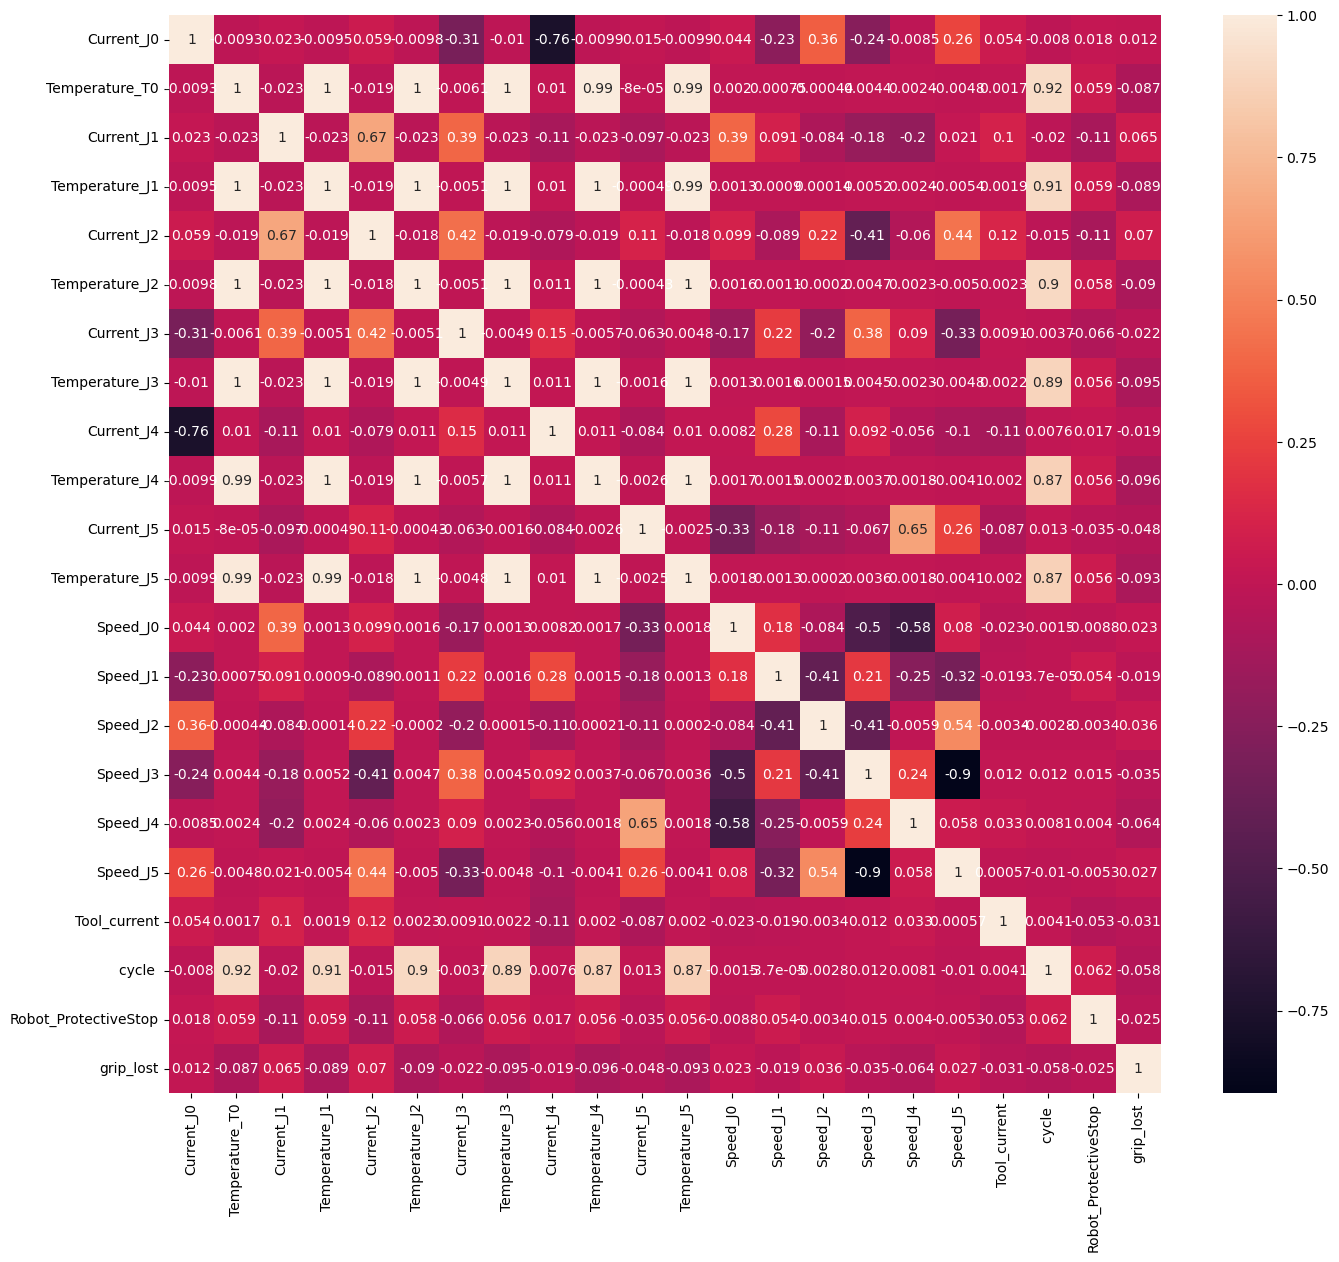

In [16]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
df.tail()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
7404,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.375,-0.019447,45.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080013,264,0,0
7405,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.375,-0.009186,45.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.078740,264,0,0
7406,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.375,-0.002978,45.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.091471,264,0,0
7407,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.375,-0.001136,45.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090026,264,0,0
7408,-0.134429,37.1250,-2.244449,40.3125,-1.098950,40.6875,-0.502397,43.375,-0.025829,45.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089097,264,0,0


In [18]:
df.shape

(7355, 22)

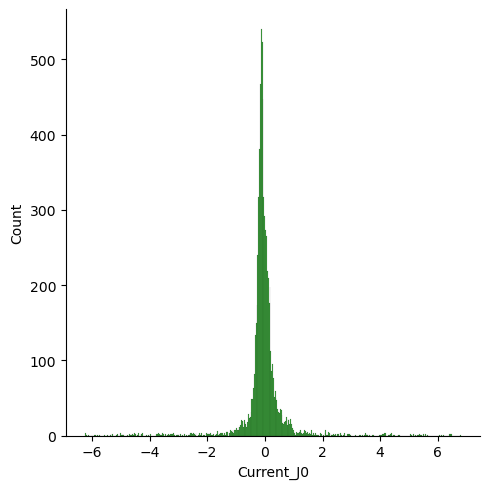

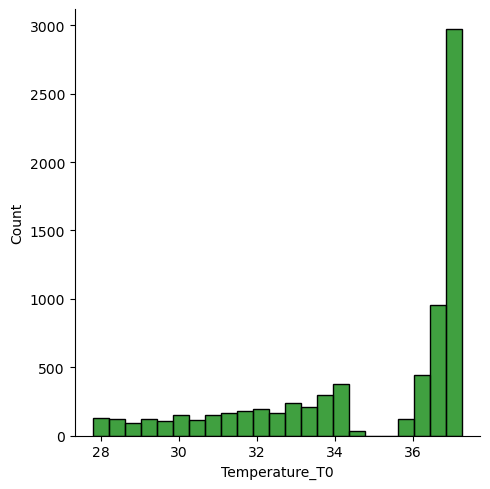

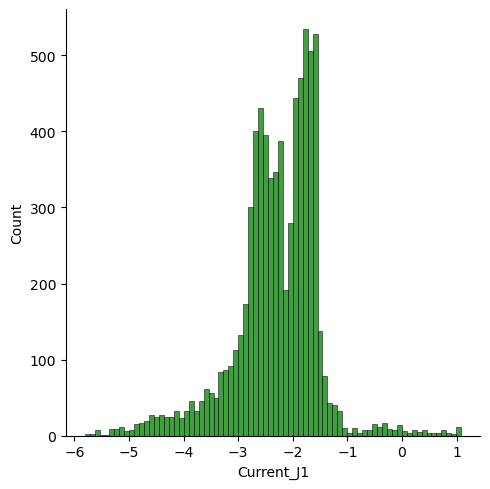

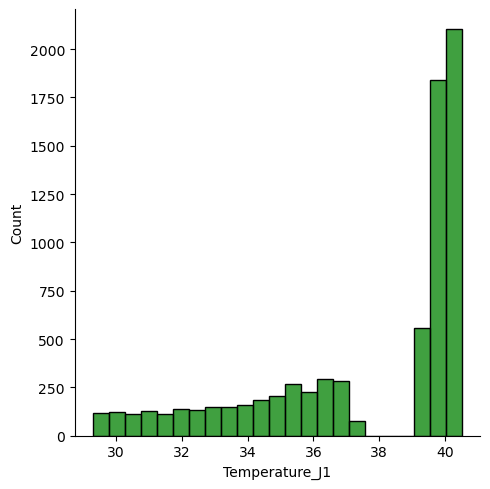

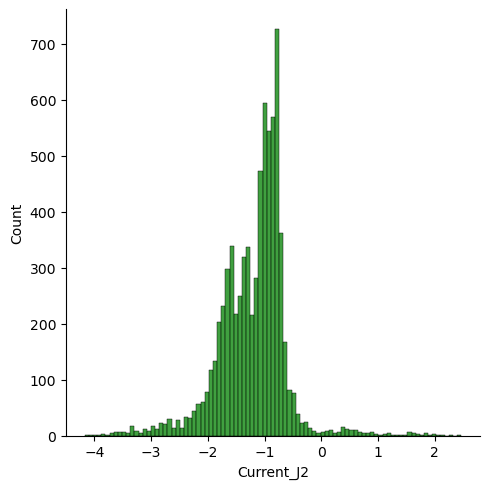

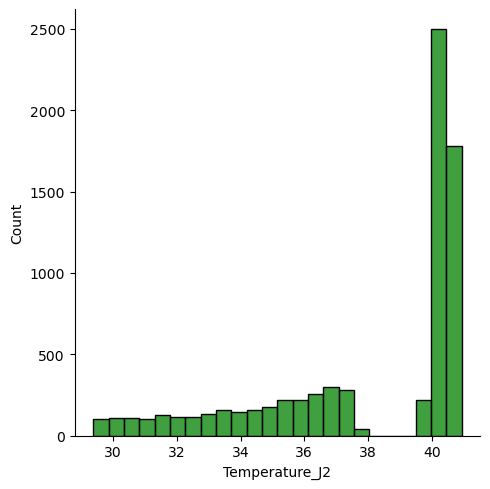

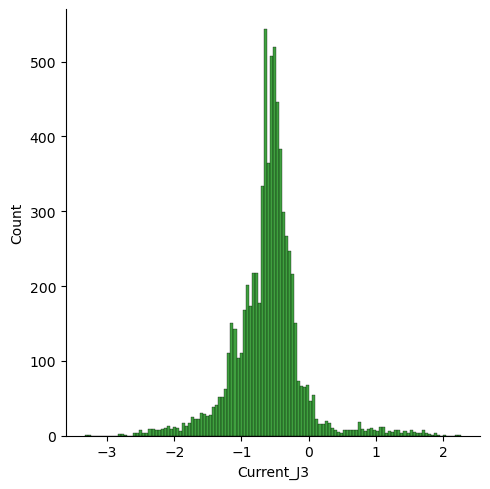

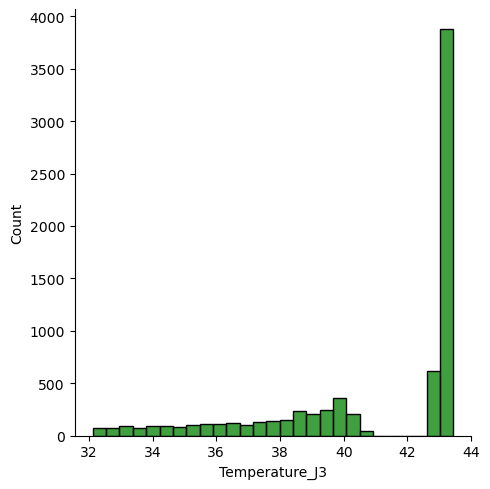

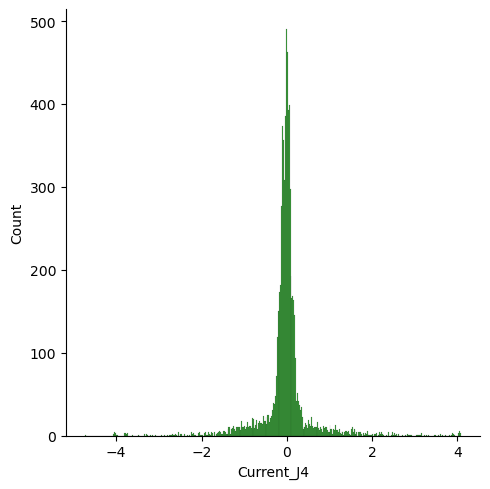

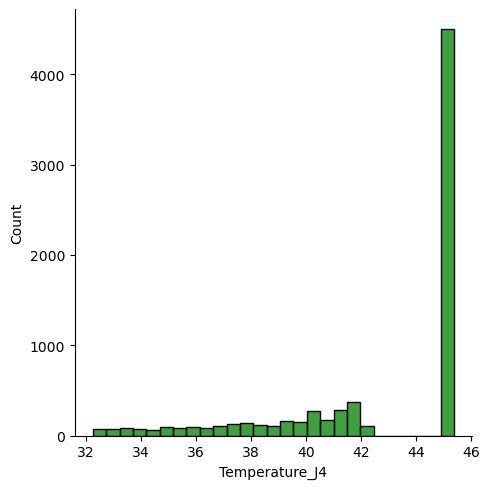

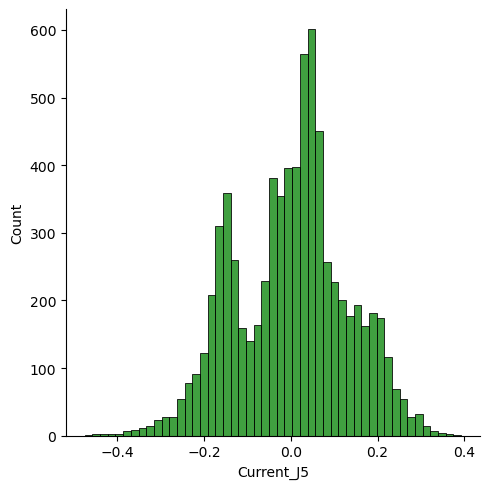

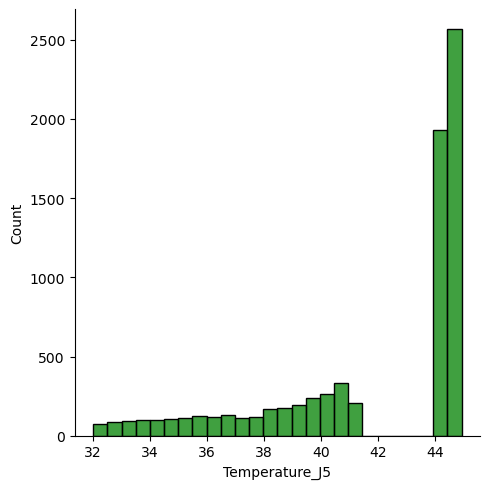

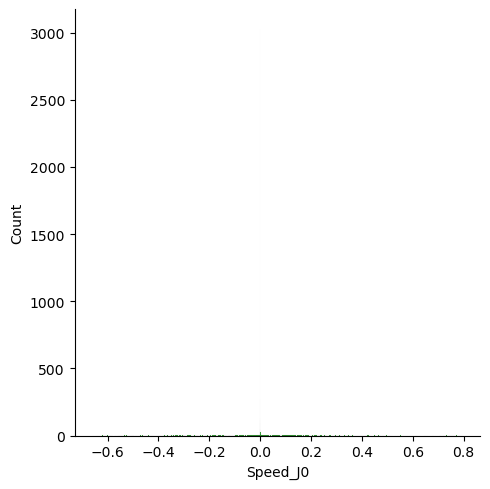

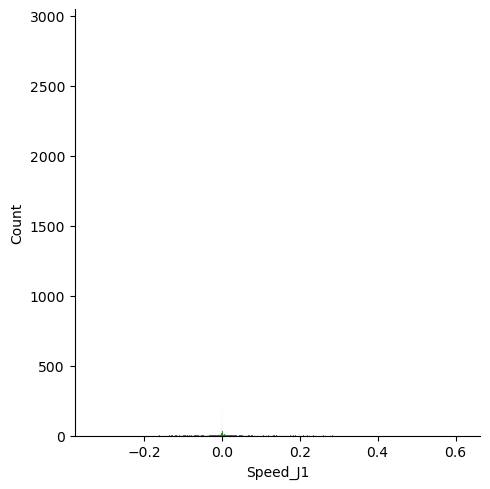

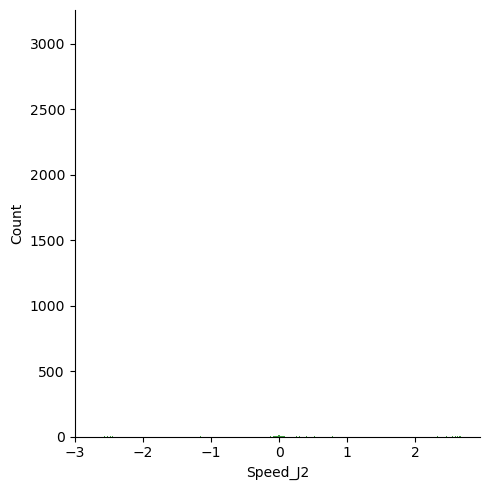

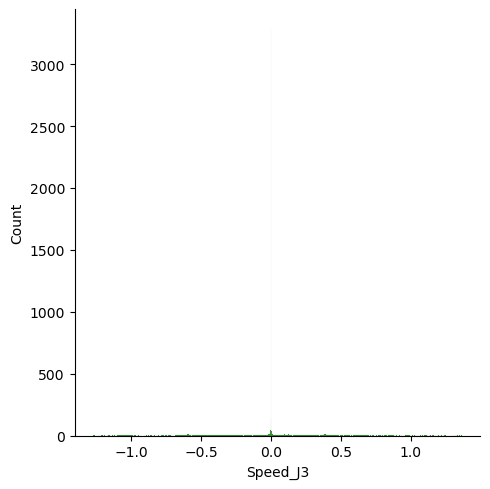

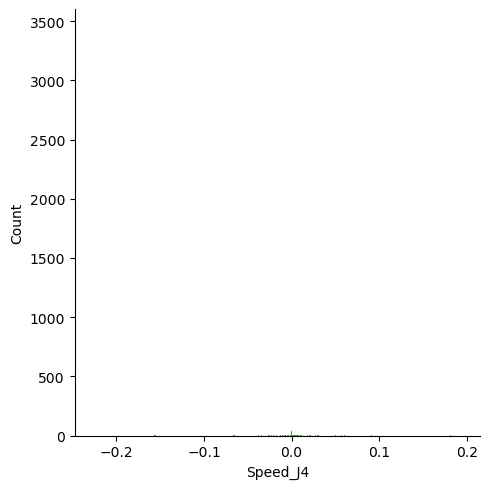

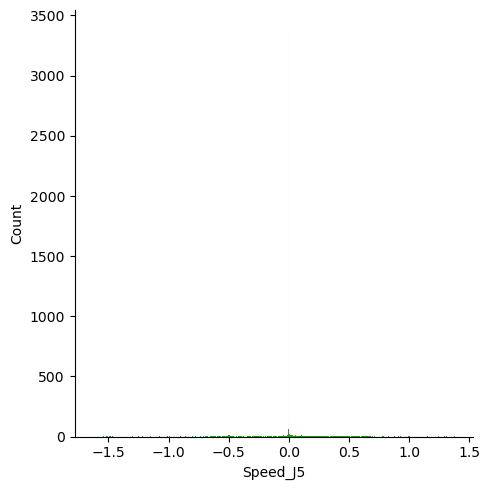

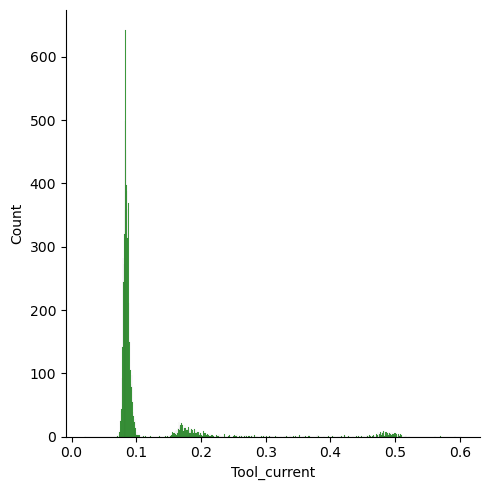

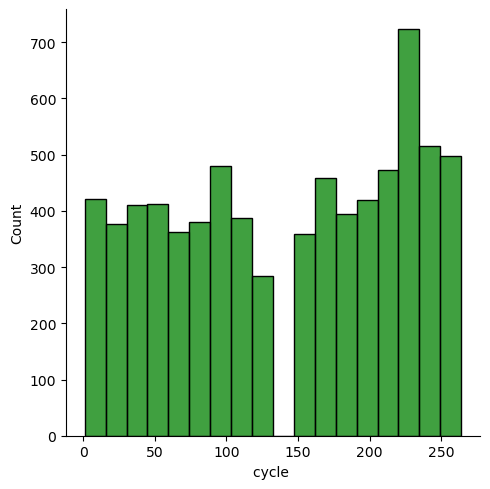

In [19]:
for col in df.columns:
    if col not in['Robot_ProtectiveStop','grip_lost']:
        sns.displot(df[col],color='green')

box-plot:


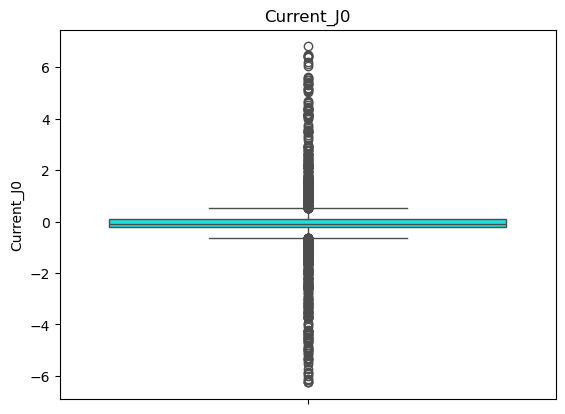

box-plot:


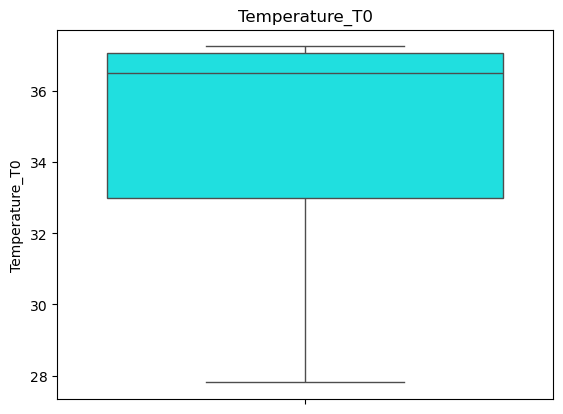

box-plot:


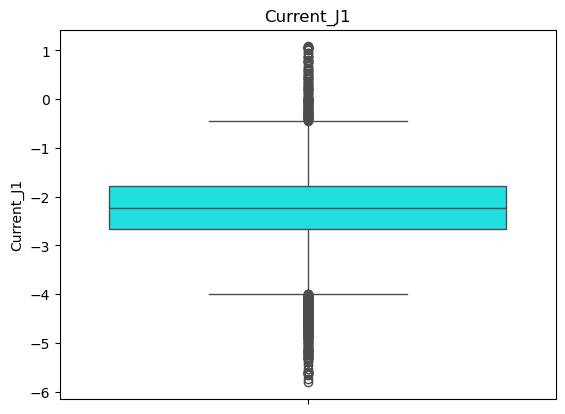

box-plot:


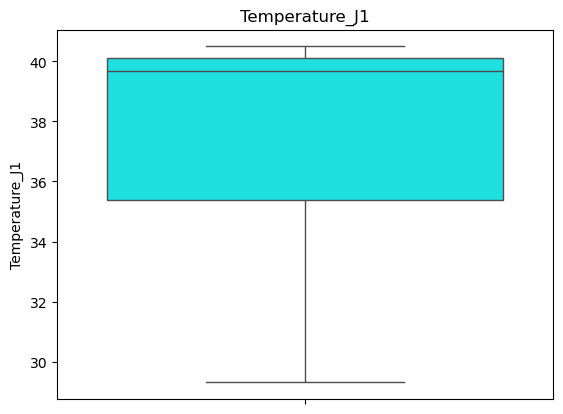

box-plot:


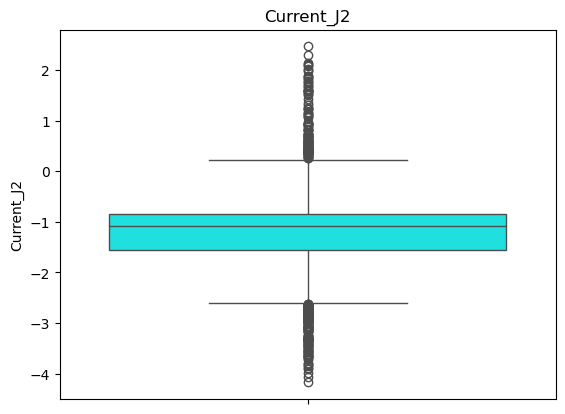

box-plot:


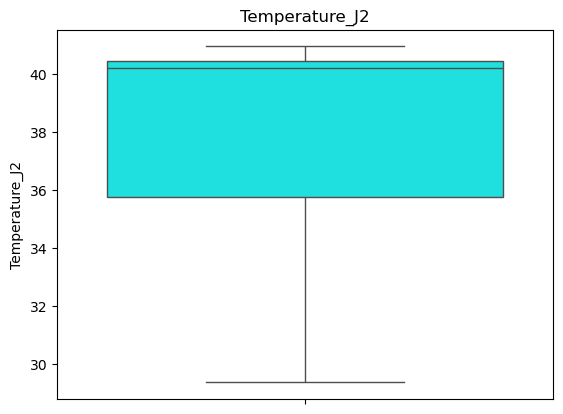

box-plot:


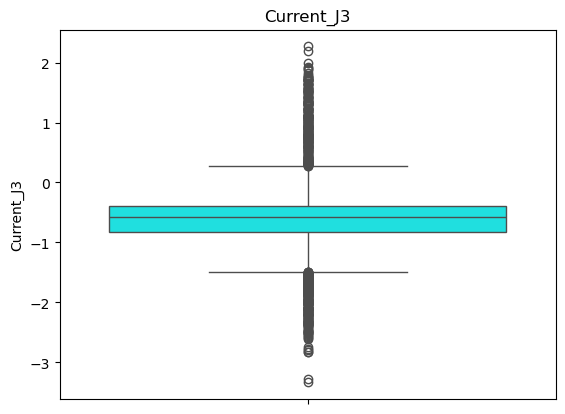

box-plot:


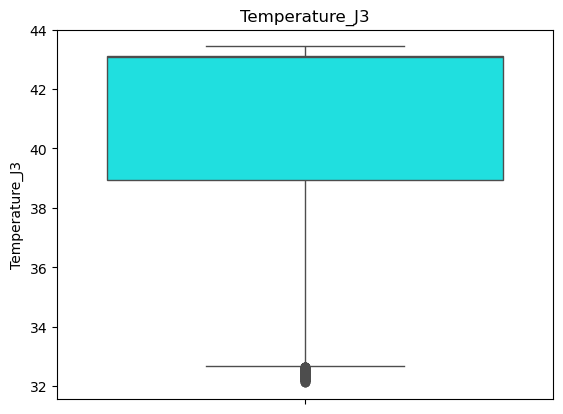

box-plot:


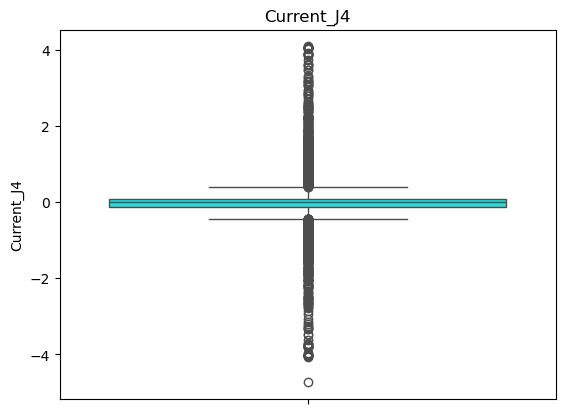

box-plot:


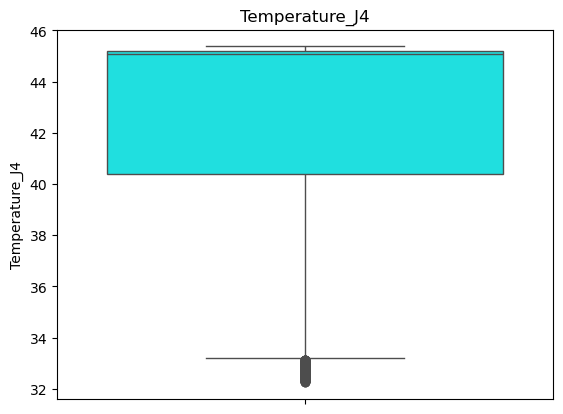

box-plot:


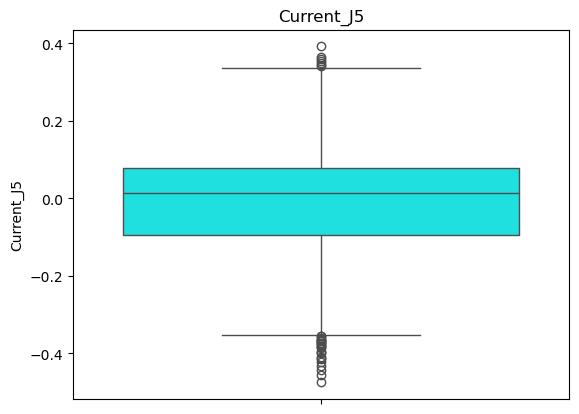

box-plot:


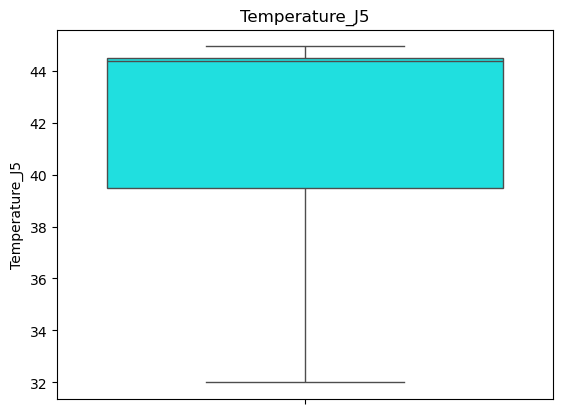

box-plot:


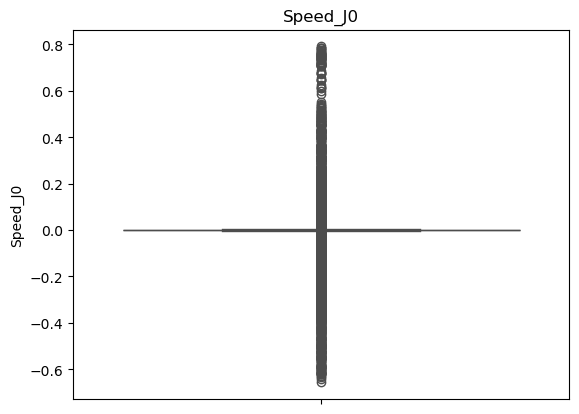

box-plot:


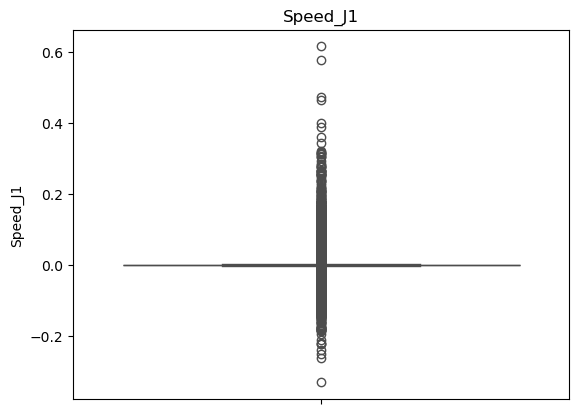

box-plot:


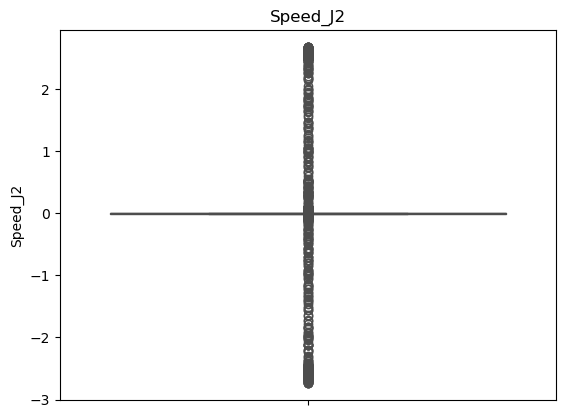

box-plot:


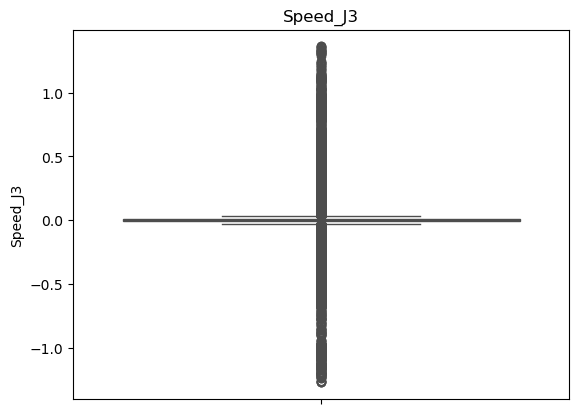

box-plot:


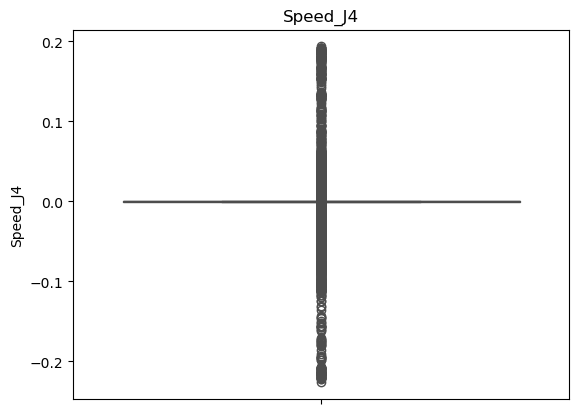

box-plot:


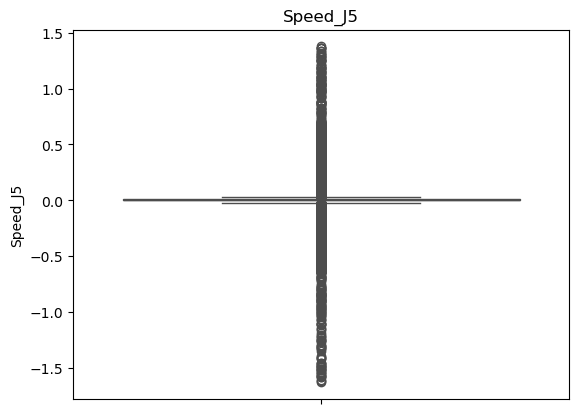

box-plot:


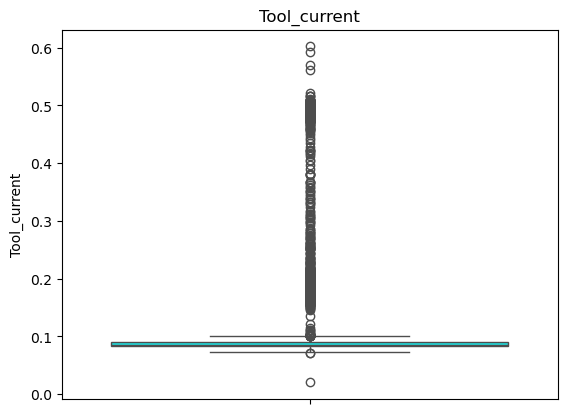

box-plot:


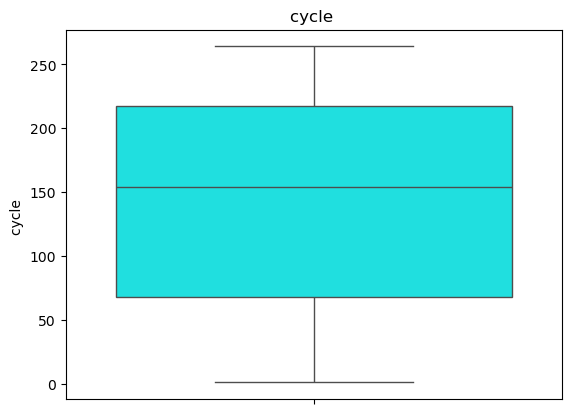

In [20]:
for col in df.columns:
    if col not in ['Robot_ProtectiveStop','grip_lost']:
        print('box-plot:')
        sns.boxplot(df[col],color="cyan")
        plt.title(col)
        plt.show()

In [21]:
for col in df.drop(['Robot_ProtectiveStop','grip_lost'],axis=1).columns:
    lower_limit ,upper_limit = df[col].quantile([0.25,0.75])
    iqr = upper_limit-lower_limit
    lower=lower_limit - 1.5*iqr
    upper=upper_limit + 1.5*iqr
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

box-plot:


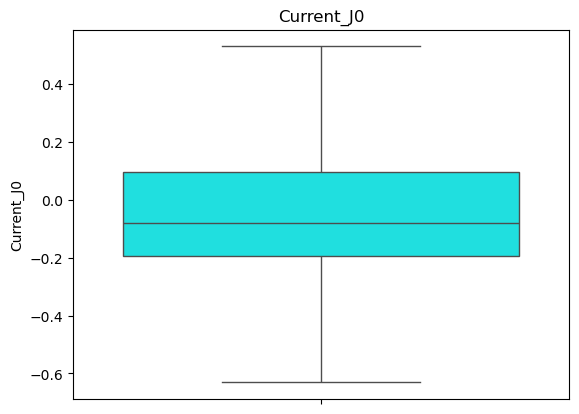

box-plot:


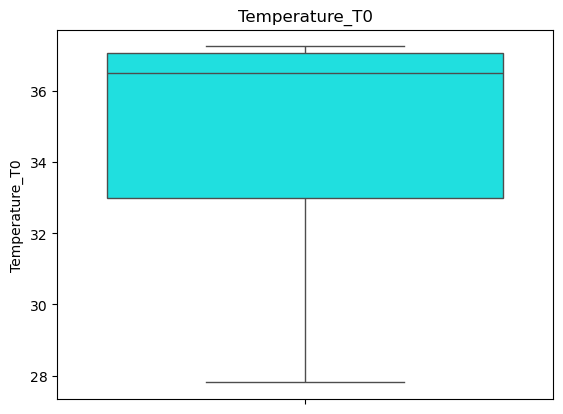

box-plot:


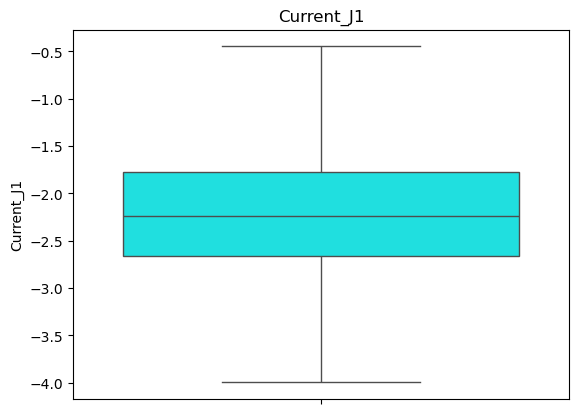

box-plot:


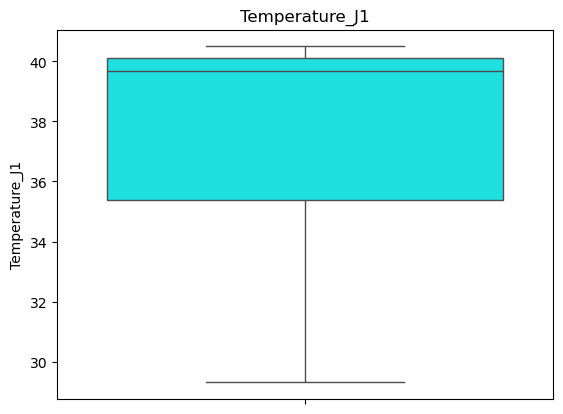

box-plot:


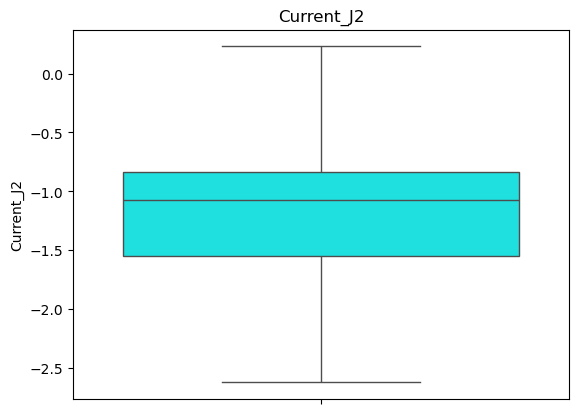

box-plot:


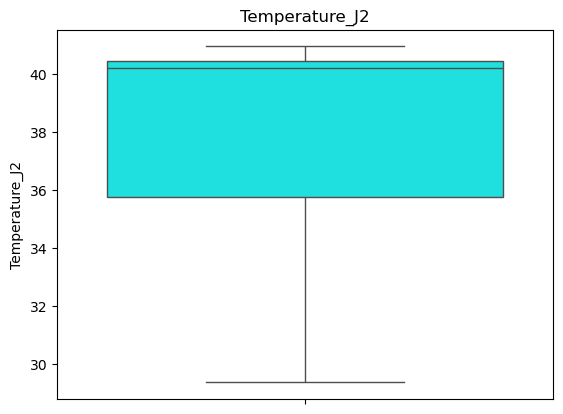

box-plot:


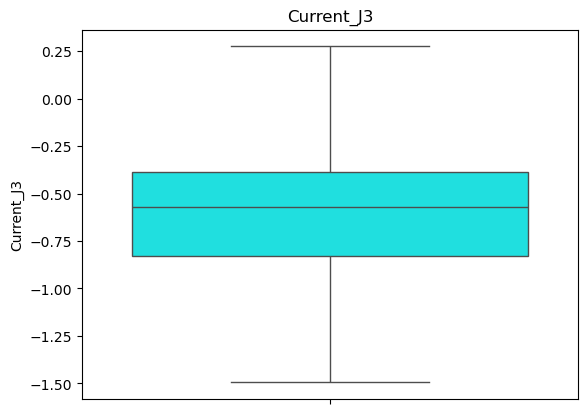

box-plot:


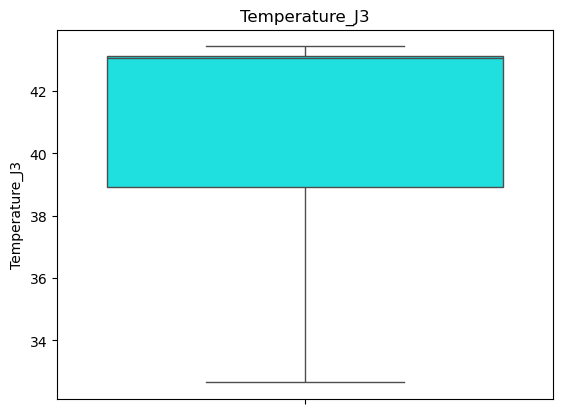

box-plot:


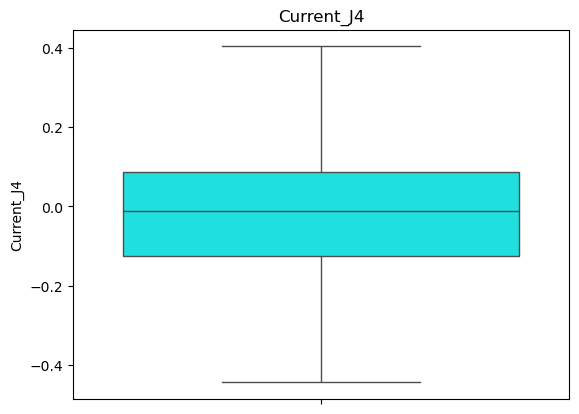

box-plot:


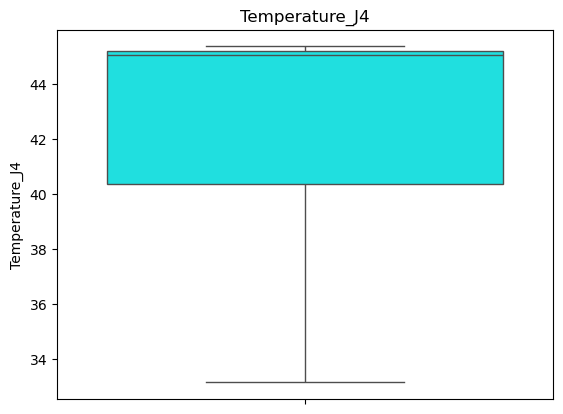

box-plot:


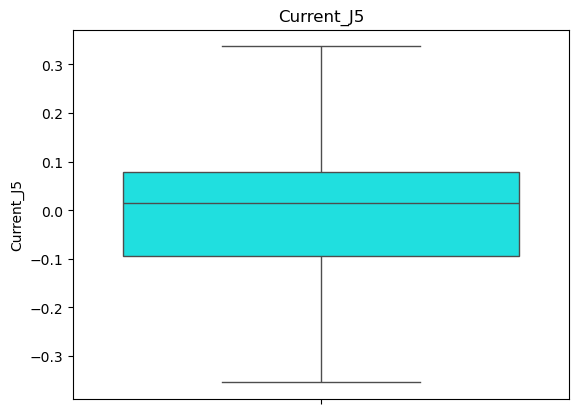

box-plot:


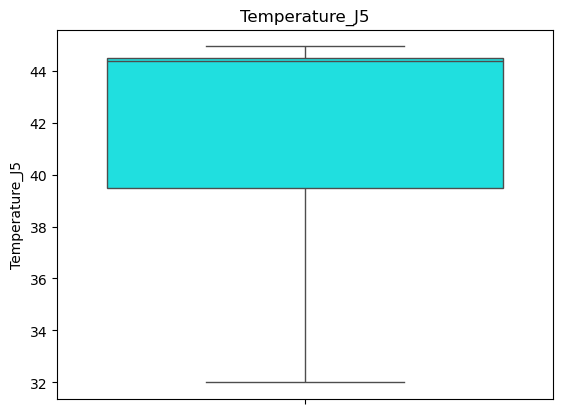

box-plot:


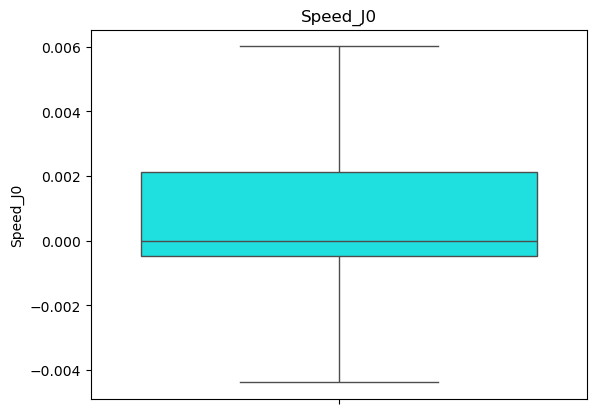

box-plot:


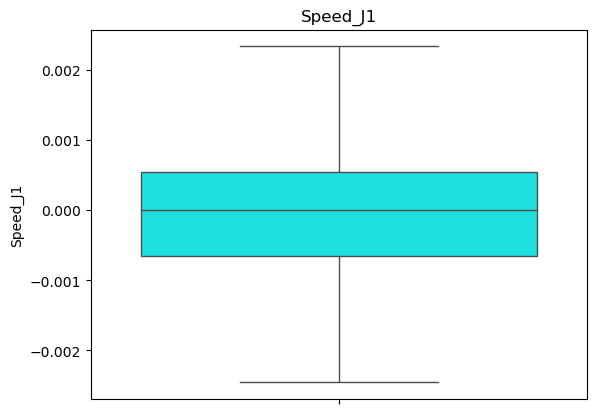

box-plot:


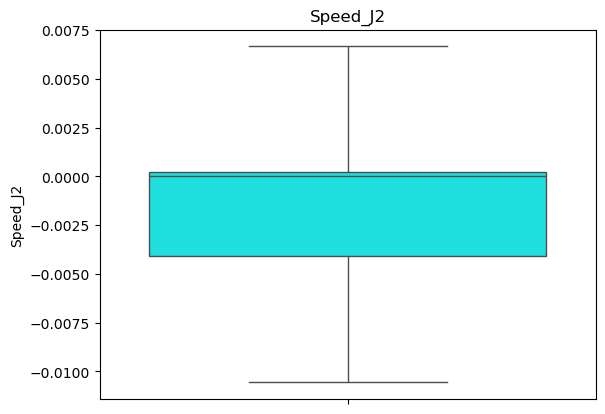

box-plot:


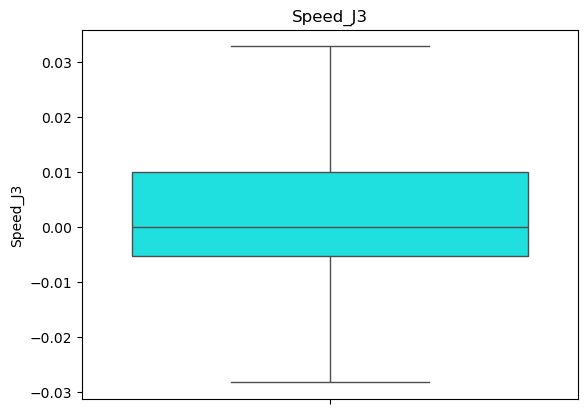

box-plot:


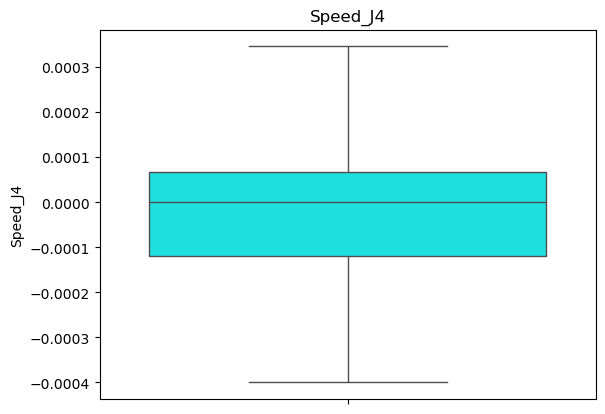

box-plot:


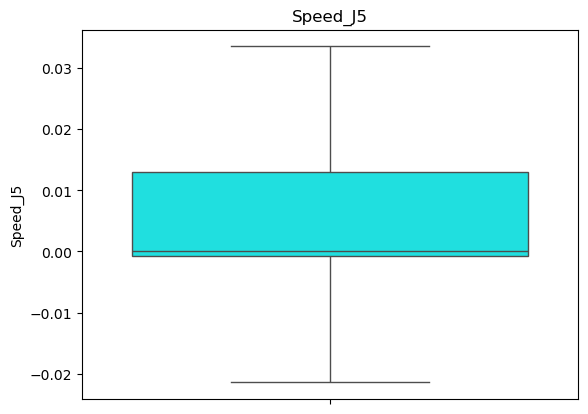

box-plot:


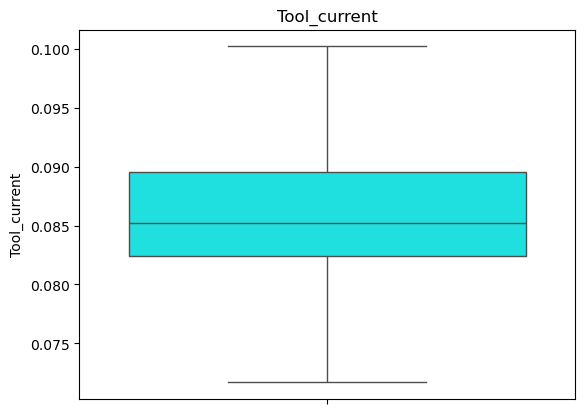

box-plot:


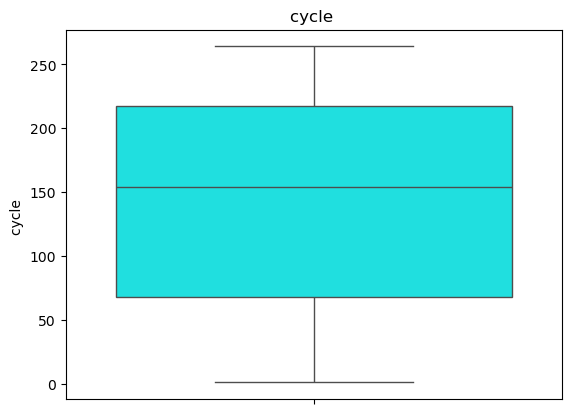

In [22]:
for col in df.columns:
    if col not in ['Robot_ProtectiveStop','grip_lost']:
        print('box-plot:')
        sns.boxplot(df[col],color='cyan')
        plt.title(col)
        plt.show()

In [23]:
df.columns

Index(['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle ', 'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')

In [24]:
x=df.drop(['Robot_ProtectiveStop','grip_lost'],axis=1)
y=df['grip_lost']

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_scaled= pd.DataFrame(sc.fit_transform(x))

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [27]:
col=['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle ']
feature_imp = pd.Series(model.feature_importances_,index=col)
feature_imp

Current_J0        0.067523
Temperature_T0    0.051002
Current_J1        0.070873
Temperature_J1    0.058766
Current_J2        0.070033
Temperature_J2    0.058938
Current_J3        0.064198
Temperature_J3    0.047644
Current_J4        0.065058
Temperature_J4    0.048358
Current_J5        0.066231
Temperature_J5    0.055128
Speed_J0          0.024742
Speed_J1          0.033096
Speed_J2          0.035448
Speed_J3          0.022287
Speed_J4          0.021432
Speed_J5          0.028786
Tool_current      0.046965
cycle             0.063494
dtype: float64

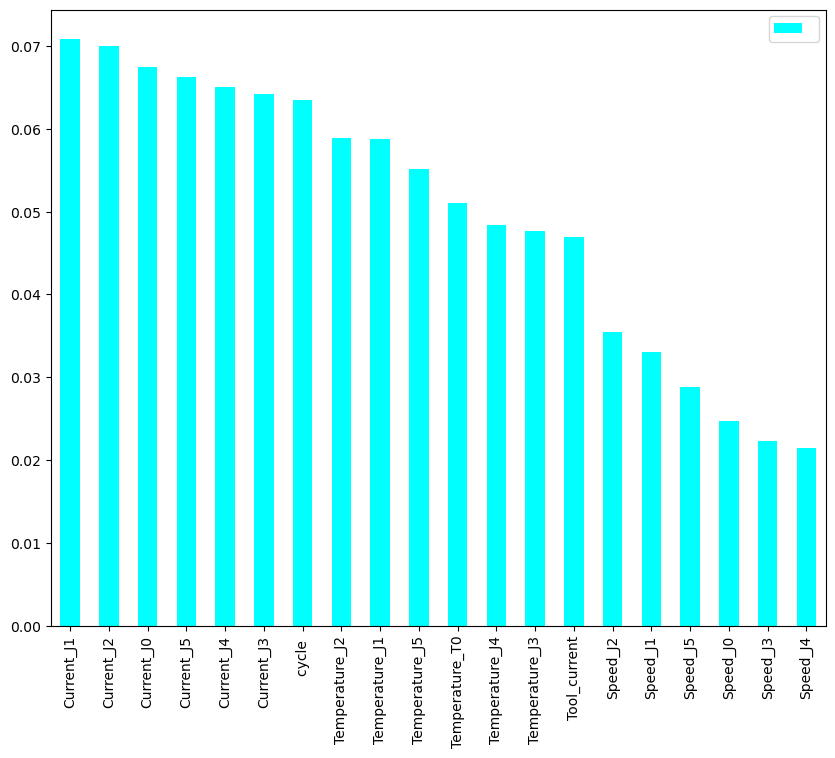

In [28]:
plt.figure(figsize=(10,8))
feature_imp.nlargest(20).plot(kind="bar",legend="True",color='Cyan')
plt.show()

In [29]:
no_griplost = df[df['grip_lost']==0]
yes_griplost= df[df['grip_lost']==1]

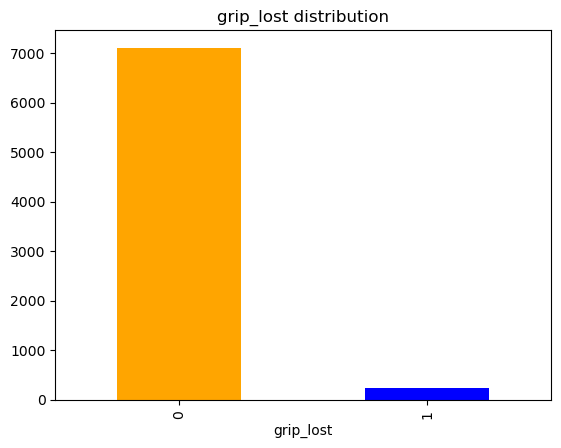

In [30]:
count_grip = pd.value_counts(df['grip_lost'],sort=True)
count_grip.plot(kind='bar',color=['orange','blue'])
plt.title('grip_lost distribution')
plt.show()

In [31]:
from imblearn.over_sampling import RandomOverSampler
smk = RandomOverSampler(random_state=42)
x_res,y_res = smk.fit_resample(x,y)

Text(0.5, 1.0, 'grip lost after resampling')

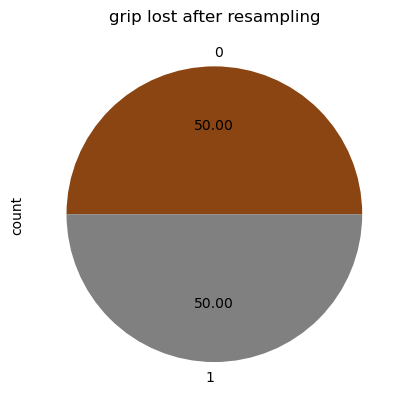

In [32]:
y_res.value_counts().plot(kind='pie',autopct='%0.2f',colors=['saddlebrown','gray'])
plt.title("grip lost after resampling")

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [35]:
print("The shape of x_train",x_train.shape)
print("The shape of x_test",x_test.shape)
print("The shape of y_train",y_train.shape)
print("The shape of y_test",y_test.shape)

The shape of x_train (11379, 20)
The shape of x_test (2845, 20)
The shape of y_train (11379,)
The shape of y_test (2845,)


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
lr_pred = lr.predict(x_test)

In [41]:
lr_acc = accuracy_score(lr_pred,y_test)
lr_pc= precision_score(lr_pred,y_test)
lr_recall = recall_score(lr_pred,y_test)
lr_f1 = f1_score(lr_pred,y_test)

In [42]:
print(lr_acc)
print(lr_pc)
print(lr_recall)
print(lr_f1)

0.7036906854130053
0.6694560669456067
0.7223476297968398
0.6948968512486428


In [43]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1516
           1       0.67      0.72      0.69      1329

    accuracy                           0.70      2845
   macro avg       0.70      0.70      0.70      2845
weighted avg       0.71      0.70      0.70      2845



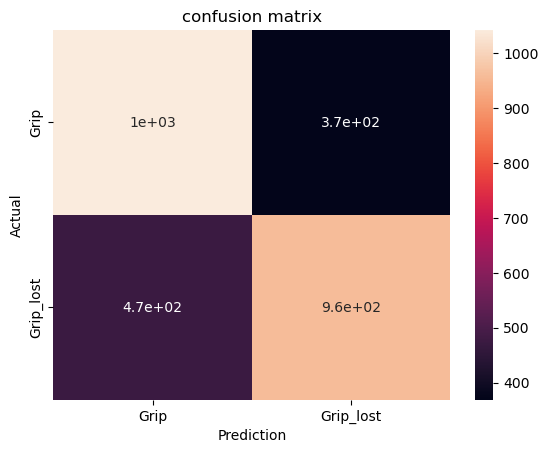

In [44]:
lr_cm= confusion_matrix(y_test,lr_pred)
sns.heatmap(lr_cm,annot=True,
            xticklabels=
            ['Grip','Grip_lost'],
            yticklabels=
            ['Grip','Grip_lost'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [47]:
svc_pred=svc.predict(x_test)

In [48]:
print(accuracy_score(svc_pred,y_test))
print(precision_score(svc_pred,y_test))
print(recall_score(svc_pred,y_test))
print(f1_score(svc_pred,y_test))

0.5838312829525484
0.3528591352859135
0.6640419947506562
0.46083788706739526


In [49]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.55      0.66      2083
           1       0.35      0.66      0.46       762

    accuracy                           0.58      2845
   macro avg       0.59      0.61      0.56      2845
weighted avg       0.69      0.58      0.61      2845



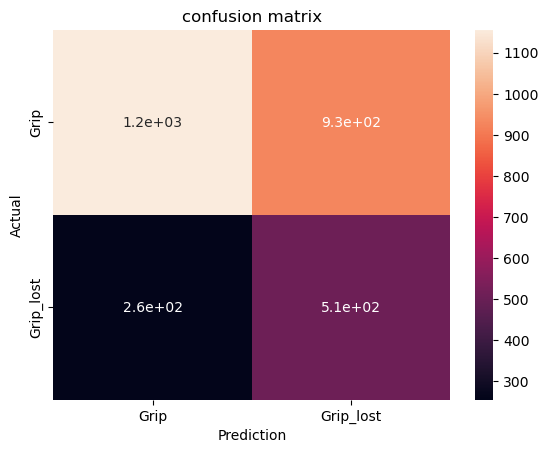

In [50]:
svc_cm= confusion_matrix(svc_pred,y_test)
sns.heatmap(svc_cm,annot=True,
            xticklabels=
            ['Grip','Grip_lost'],
            yticklabels=
            ['Grip','Grip_lost'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
dt_pred = dt.predict(x_test)

In [54]:
print(accuracy_score(dt_pred,y_test))
print(precision_score(dt_pred,y_test))
print(recall_score(dt_pred,y_test))
print(f1_score(dt_pred,y_test))

0.990158172231986
1.0
0.9808481532147743
0.9903314917127072


In [55]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1383
           1       1.00      0.98      0.99      1462

    accuracy                           0.99      2845
   macro avg       0.99      0.99      0.99      2845
weighted avg       0.99      0.99      0.99      2845



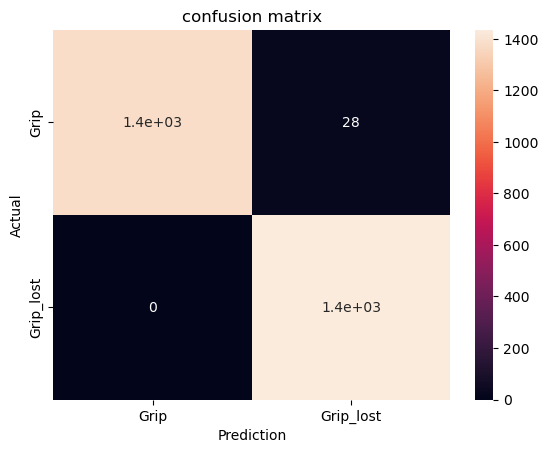

In [56]:
dt_cm= confusion_matrix(y_test,dt_pred)
sns.heatmap(dt_cm,annot=True,
            xticklabels=
            ['Grip','Grip_lost'],
            yticklabels=
            ['Grip','Grip_lost'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
Rf_pred = Rf.predict(x_test)

In [60]:
print(accuracy_score(Rf_pred,y_test))
print(precision_score(Rf_pred,y_test))
print(recall_score(Rf_pred,y_test))
print(f1_score(Rf_pred,y_test))

0.9975395430579965
1.0
0.9951422623178349
0.9975652173913043


In [61]:
print(classification_report(Rf_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1404
           1       1.00      1.00      1.00      1441

    accuracy                           1.00      2845
   macro avg       1.00      1.00      1.00      2845
weighted avg       1.00      1.00      1.00      2845



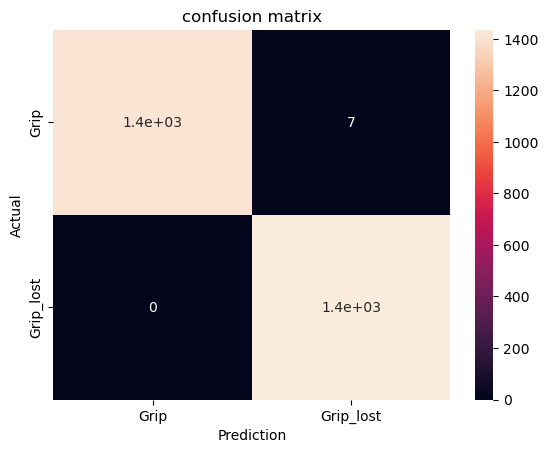

In [62]:

Rf_cm= confusion_matrix(y_test,Rf_pred)
sns.heatmap(Rf_cm,annot=True,
            xticklabels=
            ['Grip','Grip_lost'],
            yticklabels=
            ['Grip','Grip_lost'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [63]:
z=df['Robot_ProtectiveStop']
z.shape

(7355,)

In [64]:
x_res_ag,z_res = smk.fit_resample(x,z)

Text(0.5, 1.0, 'Robot_ProtectiveStop after resampling')

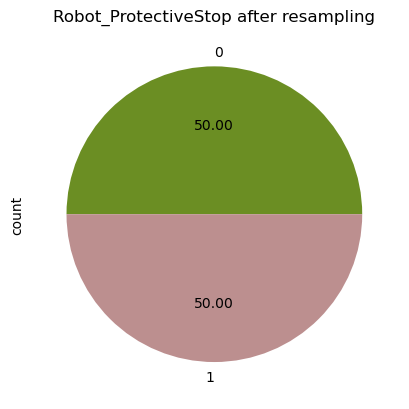

In [65]:
z_res.value_counts().plot(kind='pie',autopct='%0.2f',colors=['olivedrab','rosybrown'])
plt.title("Robot_ProtectiveStop after resampling")

In [66]:
X_train,X_test,z_train,z_test = train_test_split(x_res_ag,z_res,test_size=0.2,random_state=42)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(z_train.shape)
print(z_test.shape)

(11323, 20)
(2831, 20)
(11323,)
(2831,)


In [68]:
lr1= LogisticRegression()
lr1.fit(X_train,z_train)

LogisticRegression()

In [69]:
lr_pred1 = lr1.predict(X_test)

In [70]:
lr_acc1 = accuracy_score(lr_pred1,z_test)
lr_pc1= precision_score(lr_pred1,z_test)
lr_recall1 = recall_score(lr_pred1,z_test)
lr_f11 = f1_score(lr_pred1,z_test)

In [71]:
print(lr_acc1)
print(lr_pc1)
print(lr_recall1)
print(lr_f11)

0.6856234546096786
0.6654778887303852
0.689069423929099
0.6770682148040639


In [72]:
print(classification_report(lr_pred1,z_test))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1477
           1       0.67      0.69      0.68      1354

    accuracy                           0.69      2831
   macro avg       0.69      0.69      0.69      2831
weighted avg       0.69      0.69      0.69      2831



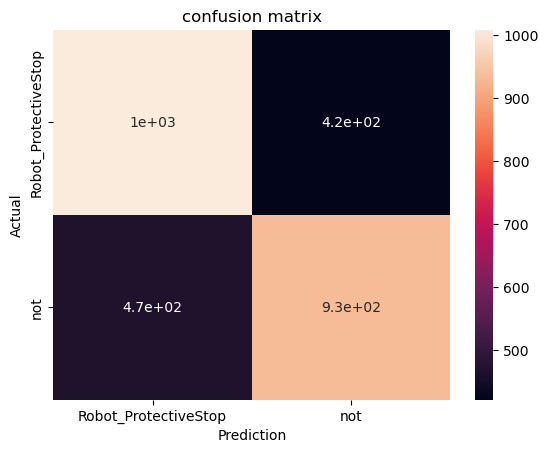

In [73]:
lr_cm1= confusion_matrix(z_test,lr_pred1)
sns.heatmap(lr_cm1,annot=True,
            xticklabels=
            ['Robot_ProtectiveStop','not'],
            yticklabels=
            ['Robot_ProtectiveStop','not'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [74]:
svc1 = SVC()
svc1.fit(X_train,z_train)

SVC()

In [75]:
svc_pred1 = svc1.predict(X_test)

In [76]:
print(accuracy_score(svc_pred1,z_test))
print(precision_score(svc_pred1,z_test))
print(recall_score(svc_pred1,z_test))
print(f1_score(svc_pred1,z_test))

0.5736488873189686
0.6797432239657631
0.5569842197545295
0.6122711211050433


In [77]:
print(classification_report(svc_pred1,z_test))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53      1120
           1       0.68      0.56      0.61      1711

    accuracy                           0.57      2831
   macro avg       0.57      0.58      0.57      2831
weighted avg       0.60      0.57      0.58      2831



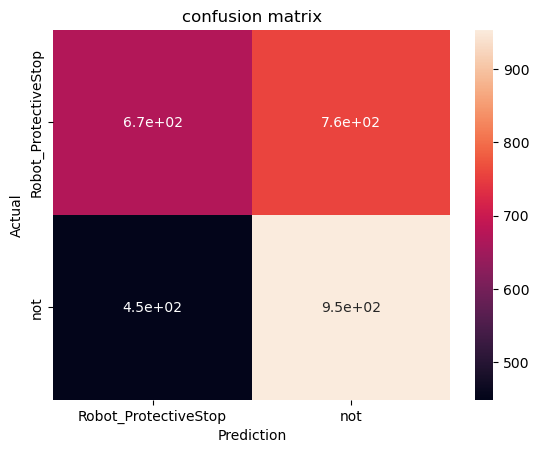

In [78]:
svc_cm1= confusion_matrix(z_test,svc_pred1)
sns.heatmap(svc_cm1,annot=True,
            xticklabels=
            ['Robot_ProtectiveStop','not'],
            yticklabels=
            ['Robot_ProtectiveStop','not'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [79]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,z_train)

DecisionTreeClassifier()

In [80]:
dt_pred1 = dt1.predict(X_test)

In [81]:
print(accuracy_score(dt_pred1,z_test))
print(precision_score(dt_pred1,z_test))
print(recall_score(dt_pred1,z_test))
print(f1_score(dt_pred1,z_test))

0.9886965736488873
1.0
0.9776847977684798
0.9887165021156559


In [82]:
print(classification_report(dt_pred1,z_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1397
           1       1.00      0.98      0.99      1434

    accuracy                           0.99      2831
   macro avg       0.99      0.99      0.99      2831
weighted avg       0.99      0.99      0.99      2831



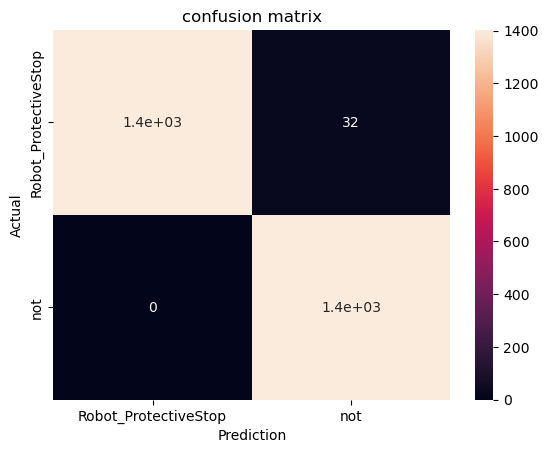

In [83]:
dt_cm1= confusion_matrix(z_test,dt_pred1)
sns.heatmap(dt_cm1,annot=True,
            xticklabels=
            ['Robot_ProtectiveStop','not'],
            yticklabels=
            ['Robot_ProtectiveStop','not'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [84]:
Rf1= RandomForestClassifier()
Rf1.fit(X_train,z_train)

RandomForestClassifier()

In [85]:
Rf_pred1 = Rf1.predict(X_test)

In [86]:
print(accuracy_score(Rf_pred1,z_test))
print(precision_score(Rf_pred1,z_test))
print(recall_score(Rf_pred1,z_test))
print(f1_score(Rf_pred1,z_test))

0.9915224302366655
1.0
0.9831697054698457
0.9915134370579916


In [87]:
print(classification_report(Rf_pred1,z_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1405
           1       1.00      0.98      0.99      1426

    accuracy                           0.99      2831
   macro avg       0.99      0.99      0.99      2831
weighted avg       0.99      0.99      0.99      2831



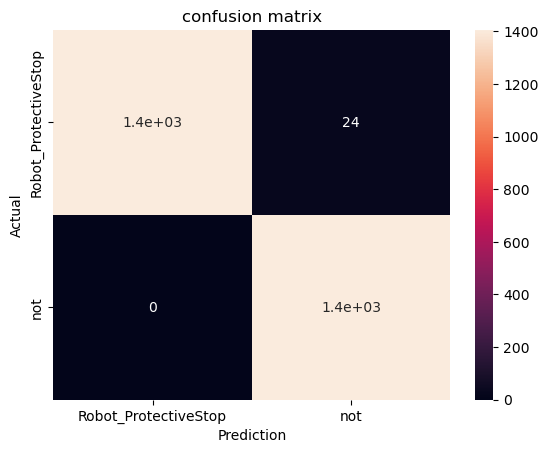

In [88]:
Rf_cm1= confusion_matrix(z_test,Rf_pred1)
sns.heatmap(Rf_cm1,annot=True,
            xticklabels=
            ['Robot_ProtectiveStop','not'],
            yticklabels=
            ['Robot_ProtectiveStop','not'])
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()

In [89]:
import pickle

In [90]:
 pickle.dump(Rf,open("Grip.pkl",'wb'))

In [91]:
pickle.dump(Rf1,open("Protective.pkl",'wb'))

In [186]:
X_train

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle
10539,0.021892,37.0625,-3.078425,40.1250,-2.214651,40.5000,-1.016847,43.1250,0.238920,45.1250,-0.040660,44.3750,0.000000e+00,-1.572635e-03,1.100130e-03,3.475445e-05,0.000000,0.000000e+00,0.084426,224.0
594,-0.078537,29.9375,-1.823592,31.7500,-1.590194,32.0000,-0.455865,35.0625,0.045601,35.8125,0.017655,35.1250,0.000000e+00,-8.321210e-38,4.863833e-04,-4.896777e-39,0.000000,0.000000e+00,0.084598,22.0
8675,-0.014116,36.0000,-2.577321,39.3125,-1.623163,39.9375,-1.224505,42.9375,-0.157522,45.1250,-0.066504,44.8750,-5.647640e-11,-1.984953e-03,-2.331888e-37,-3.311808e-03,-0.000121,1.468808e-07,0.085278,108.0
5786,-0.188641,37.0625,-2.382252,40.2500,-0.998684,40.6250,-0.438729,43.1875,-0.013481,45.1875,0.064478,44.3750,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.083833,226.0
3991,-0.248042,36.6875,-2.563781,39.8125,-1.418907,40.2500,-0.244563,43.1250,0.146181,45.1875,-0.148606,44.5625,-4.381107e-03,2.337663e-03,-1.055713e-02,3.282792e-02,-0.000400,-2.139293e-02,0.083833,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.521933,37.0000,-3.593133,40.0625,-2.382087,40.4375,-0.316818,43.0625,0.251101,45.0625,-0.159990,44.3750,-4.381107e-03,2.337663e-03,-1.055713e-02,3.282792e-02,-0.000400,-2.139293e-02,0.079420,207.0
13418,0.110670,36.9375,-1.831045,40.0000,-1.390012,40.3750,-0.596019,43.0625,-0.059319,45.1250,0.007554,44.4375,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.077467,194.0
5390,0.118513,37.0625,-3.673144,40.0625,-1.623588,40.4375,-1.208015,43.1250,-0.014846,45.0625,-0.042268,44.3750,0.000000e+00,0.000000e+00,0.000000e+00,-3.609505e-17,0.000000,0.000000e+00,0.078061,214.0
860,0.399474,30.7500,-2.921825,32.7500,-0.828289,33.0000,-1.269139,36.1250,-0.201714,37.1250,0.175784,36.2500,-4.381107e-03,-2.456210e-03,6.662106e-03,-2.828120e-02,0.000346,3.351483e-02,0.083919,33.0


In [188]:
try:
    feature_names = model.feature_names_in_
    print("Model was trained with these features:")
    print(feature_names)
except AttributeError:
    print("feature_names_in_ attribute not found in the model. Trying alternative...")

    # If model is part of a pipeline (e.g., StandardScaler + Model), access the final estimator
    try:
        feature_names = model.named_steps['your_model_name'].feature_names_in_
        print("Pipeline model features:")
        print(feature_names)
    except:
        print("Model structure doesn't store feature names.")

Model was trained with these features:
['Current_J0' 'Temperature_T0' 'Current_J1' 'Temperature_J1' 'Current_J2'
 'Temperature_J2' 'Current_J3' 'Temperature_J3' 'Current_J4'
 'Temperature_J4' 'Current_J5' 'Temperature_J5' 'Speed_J0' 'Speed_J1'
 'Speed_J2' 'Speed_J3' 'Speed_J4' 'Speed_J5' 'Tool_current' 'cycle ']
